# Long Drought data check

In [6]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [7]:
point = 'POINT(-121.46875 38.59375)'
params = {'g': point}

In [21]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Request header
headers = {'ContentType': 'json'}

def celsius_to_F(val):
    return val * 9/5 + 32

def kelvin_to_F(val):
    return  (val - 273.15) * 9/5 + 32

def mm_to_inches(val):
    return  val * 0.0393701

def process_daily_data(slug, params):
    # Make request
    url = api + '/series/' + slug + '/rasters/'
    response = requests.get(url, params=params)
    
    # Get data
    if response.ok:
        print('Processing:', slug)
        json = response.json()
        data = json['results'][0]

        # Multiband raster data is returned by the API as a 3D array having a shape like (233376, 1, 1)
        # Flatten the 3D array into a 1D array
        values_arr = np.array(data['image'])
        values_arr = values_arr.flatten()

        # Get total number of values -> number of days
        length = len(values_arr)

        # Get start date of timeseries
        start_date = datetime.strptime(data['event'], '%Y-%m-%d')

        # Create new pandas dataframe and map each value in list to a date index
        df = pd.DataFrame(
            values_arr,
            index=pd.date_range(start_date, freq='1D', periods=length),
            columns=['value'],
        )

        # Convert units to Fahrenheit
        units = data['units']
        if units == 'C':
            df.value = df.value.apply(lambda x: celsius_to_F(x))
        elif units == 'K':
            df.value = df.value.apply(lambda x: kelvin_to_F(x))
        elif units == 'mm':
            df.value = df.value.apply(lambda x: mm_to_inches(x))
        else:
            pass
            
        # Add slug as a column
        df['slug'] = slug  

    else:
        print('Failed to download:', slug)
            
    # Combine all the dataframes into one and return
    return df

In [22]:
df = process_daily_data('swe_day_drought_HadGEM2-ES_rcp85_late_century', params)
df

Processing: swe_day_drought_HadGEM2-ES_rcp85_late_century


,value,slug
2046-01-01,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-02,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-03,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-04,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-05,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-06,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-07,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-08,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-09,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century
2046-01-10,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century


In [23]:
df['year'] = df.index.year
df['month'] = df.index.month
df['wateryear'] = np.where(df['month'] > 9, df['year'] + 1, df['year'])
df

,value,slug,year,month,wateryear
2046-01-01,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-02,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-03,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-04,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-05,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-06,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-07,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-08,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-09,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046
2046-01-10,0.0,swe_day_drought_HadGEM2-ES_rcp85_late_century,2046,1,2046


In [24]:
calendar_year = df.groupby(['year'])['value'].mean()
calendar_year

year
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
2051    0.0
2052    0.0
2053    0.0
2054    0.0
2055    0.0
2056    0.0
2057    0.0
2058    0.0
2059    0.0
2060    0.0
2061    0.0
2062    0.0
2063    0.0
2064    0.0
2065    0.0
2066    0.0
2067    0.0
2068    0.0
2069    0.0
2070    0.0
2071    0.0
2072    0.0
2073    0.0
2074    0.0
Name: value, dtype: float64

In [25]:
water_year = df.groupby(['wateryear'])['value'].mean()
water_year

wateryear
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
2051    0.0
2052    0.0
2053    0.0
2054    0.0
2055    0.0
2056    0.0
2057    0.0
2058    0.0
2059    0.0
2060    0.0
2061    0.0
2062    0.0
2063    0.0
2064    0.0
2065    0.0
2066    0.0
2067    0.0
2068    0.0
2069    0.0
2070    0.0
2071    0.0
2072    0.0
2073    0.0
2074    0.0
2075    0.0
Name: value, dtype: float64

Text(0,0.5,'Temperature')

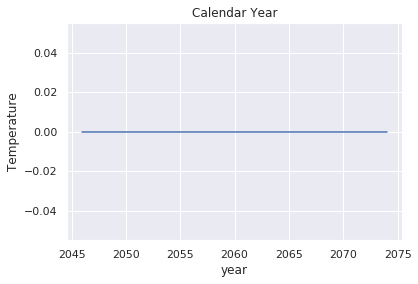

In [26]:
# Plot
calendar_year.plot()
plt.title("Calendar Year")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

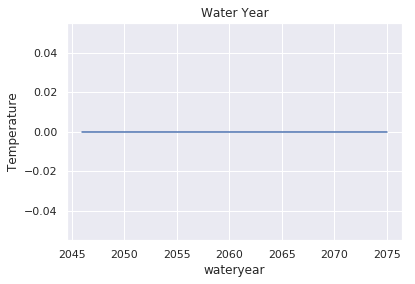

In [27]:
# Plot
water_year.plot()
plt.title("Water Year")
plt.ylabel("Temperature")

### Envelopes

In [64]:
variables = ['tasmax', 'tair', 'tasmin', 'pr', 'baseflow', 'et', 'runoff', 'swe']
df = []
for v in variables:
    slug = v + '_day_drought_HadGEM2-ES_rcp85_late_century'
    df_daily = process_daily_data(slug, params)
    df_daily['year'] = df_daily.index.year
    df_daily['month'] = df_daily.index.month
    df_daily['wateryear'] = np.where(df_daily['month'] > 9, df_daily['year'] + 1, df_daily['year'])
    water_year = df_daily.groupby(['wateryear'])['value'].mean()
    df.append(water_year.to_frame(v))

data = pd.concat(df, axis=1)
data

Processing: tasmax_day_drought_HadGEM2-ES_rcp85_late_century
Processing: tair_day_drought_HadGEM2-ES_rcp85_late_century
Processing: tasmin_day_drought_HadGEM2-ES_rcp85_late_century
Processing: pr_day_drought_HadGEM2-ES_rcp85_late_century
Processing: baseflow_day_drought_HadGEM2-ES_rcp85_late_century
Processing: et_day_drought_HadGEM2-ES_rcp85_late_century
Processing: runoff_day_drought_HadGEM2-ES_rcp85_late_century
Processing: swe_day_drought_HadGEM2-ES_rcp85_late_century


,tasmax,tair,tasmin,pr,baseflow,et,runoff,swe
wateryear,,,,,,,,
2046,81.708663,68.013910,54.316520,0.024927,0.018740,0.017892,0.002301,0.0
2047,80.307735,66.642240,52.966708,0.031617,0.013643,0.014759,0.002869,0.0
2048,79.868630,67.234099,54.599407,0.079281,0.049770,0.019100,0.010253,0.0
2049,79.385397,66.980133,54.567331,0.068375,0.039633,0.020926,0.007448,0.0
2050,78.582704,66.157444,53.727539,0.075628,0.035681,0.022136,0.009979,0.0
2051,79.373808,66.599546,53.826753,0.051758,0.033962,0.020264,0.005659,0.0
2052,79.833729,66.772995,53.701013,0.042344,0.017111,0.018818,0.003940,0.0
2053,81.289921,68.038562,54.781660,0.037423,0.016759,0.019123,0.003829,0.0
2054,80.111904,66.864055,53.613589,0.041813,0.022190,0.016031,0.004095,0.0


In [65]:
data.to_csv('drought.csv')